In [2]:
pip install pandas

In [4]:
import pandas as pd

df = pd.read_csv('cars.csv')

print(df.to_string())

      mpg  cylinders  displacement  horsepower  weight  acceleration  model_year  origin
0    18.0          8         307.0       130.0    3504          12.0          70     USA
1    15.0          8         350.0       165.0    3693          11.5          70     USA
2    18.0          8         318.0       150.0    3436          11.0          70     USA
3    16.0          8         304.0       150.0    3433          12.0          70     USA
4    17.0          8         302.0       140.0    3449          10.5          70     USA
5    15.0          8         429.0       198.0    4341          10.0          70     USA
6    14.0          8         454.0       220.0    4354           9.0          70     USA
7    14.0          8         440.0       215.0    4312           8.5          70     USA
8    14.0          8         455.0       225.0    4425          10.0          70     USA
9    15.0          8         390.0       190.0    3850           8.5          70     USA
10   15.0          8 

In [ ]:
print("Number of training examples in the data set: ")
df.shape[0]

Number of training examples in the data set: 


398

In [ ]:
print("Number of features in the data set: ")
df.shape[1]

Number of features in the data set: 


8

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64

In [ ]:
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [6]:
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['origin'].fillna(df['origin'].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

rigin
Asia      31.55
Europe    26.50
USA       18.55


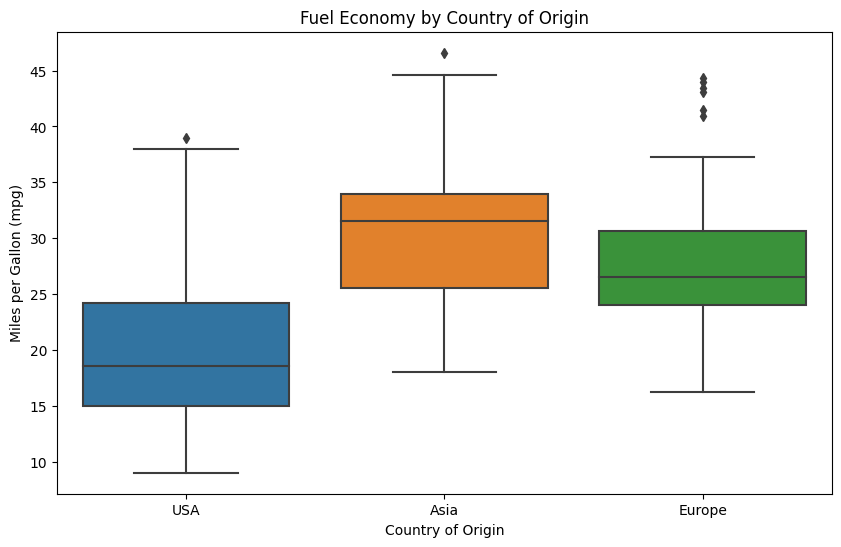

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=df)

median_mpg = df.groupby('origin')['mpg'].median()
print(median_mpg.to_string().strip('\ndName: mpg, dtype: float64'))

plt.xlabel('Country of Origin')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Fuel Economy by Country of Origin')
plt.show()

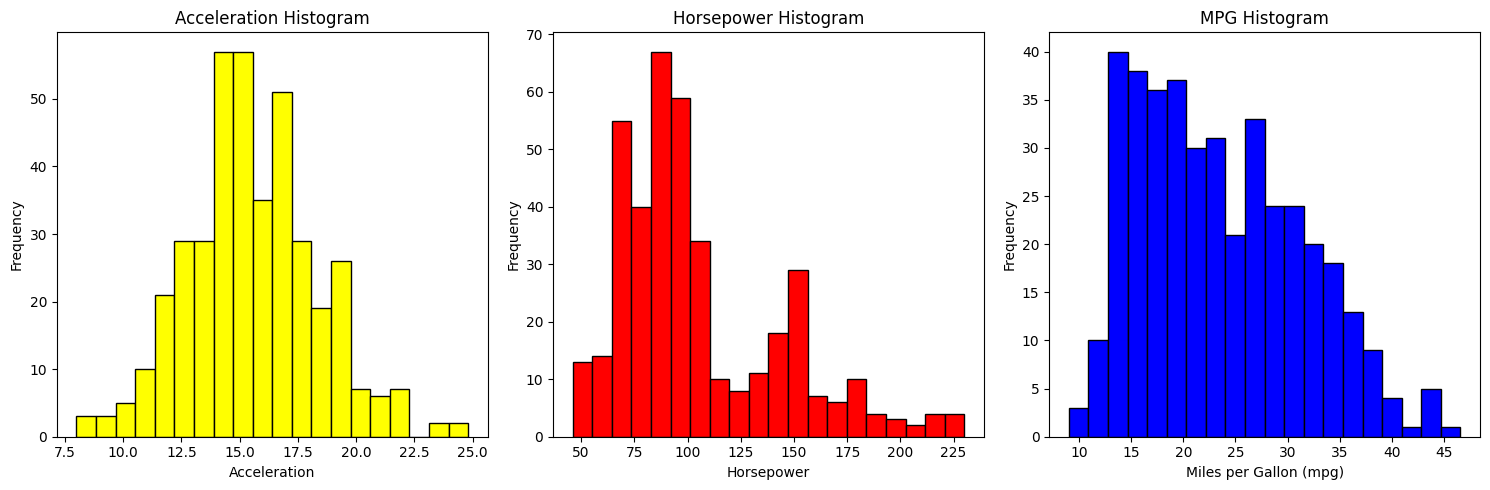

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['acceleration'], bins=20, color='yellow', edgecolor='black')
plt.title('Acceleration Histogram')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['horsepower'], bins=20, color='red', edgecolor='black')
plt.title('Horsepower Histogram')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['mpg'], bins=20, color='blue', edgecolor='black')
plt.title('MPG Histogram')
plt.xlabel('Miles per Gallon (mpg)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

features = ['acceleration', 'horsepower', 'mpg']

for feature in features:
    mean_value = df[feature].mean()
    median_value = df[feature].median()
    std_deviation = df[feature].std()

    print(f"{feature}: Mean = {mean_value:.2f}, Median = {median_value:.2f}, Standard Deviation = {std_deviation:.2f}")


acceleration: Mean = 15.57, Median = 15.50, Standard Deviation = 2.76
horsepower: Mean = 105.16, Median = 95.00, Standard Deviation = 38.60
mpg: Mean = 23.51, Median = 23.00, Standard Deviation = 7.82


In [11]:
features = ['acceleration', 'horsepower', 'mpg']

for feature in features:
    mean_value = df[feature].mean()
    median_value = df[feature].median()
    std_deviation = df[feature].std()

    skewness = 3 * (mean_value - median_value) / std_deviation

    print(f"{feature}: Pearson's Second Skewness Coefficient = {skewness:.2f}")



acceleration: Pearson's Second Skewness Coefficient = 0.07
horsepower: Pearson's Second Skewness Coefficient = 0.85
mpg: Pearson's Second Skewness Coefficient = 0.20


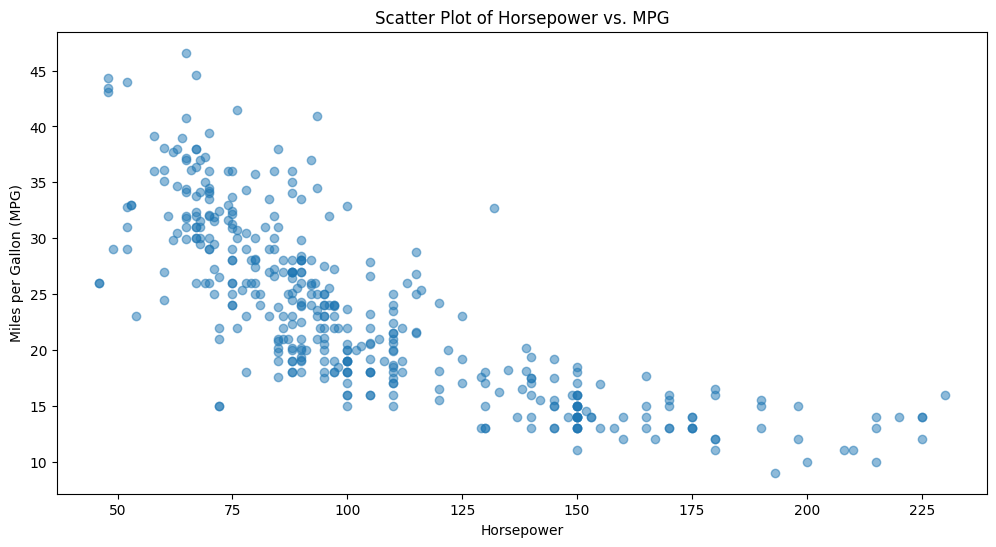

In [12]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['horsepower'], df['mpg'], alpha=0.5)

# Add labels and title
plt.title('Scatter Plot of Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')

# Show the plot
plt.show()


In [13]:
correlation_coefficient = df['horsepower'].corr(df['mpg'])
print(f"Correlation Coefficient between Horsepower and MPG: {correlation_coefficient:.2f}")

Correlation Coefficient between Horsepower and MPG: -0.77


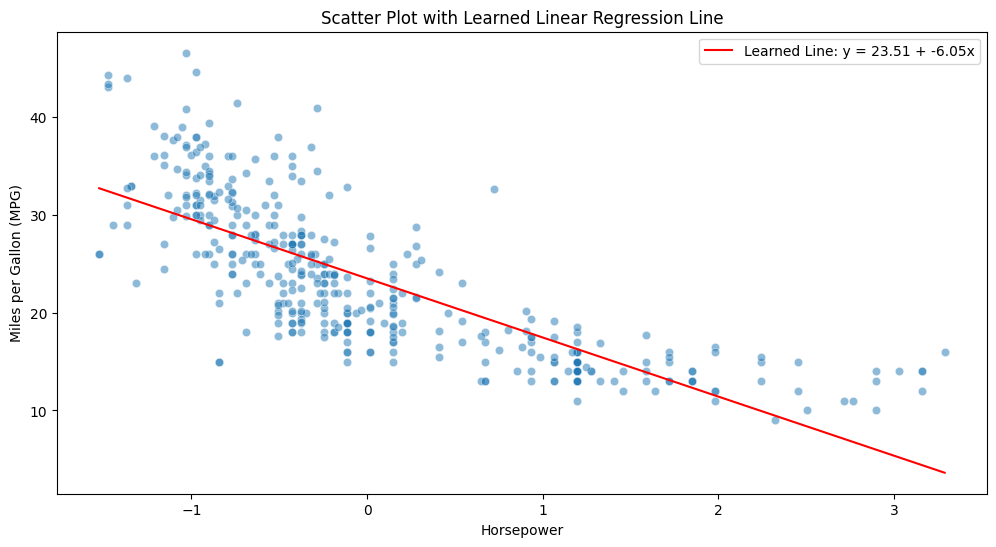

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Z score Normalization
df['horsepower'] = (df['horsepower'] - df['horsepower'].mean()) / df['horsepower'].std()

df['intercept'] = 1

X = df[['intercept', 'horsepower']].values
y = df['mpg'].values

W= np.linalg.inv(X.T @ X) @ X.T @ y

w0, w1 = W
plt.figure(figsize=(12, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df, alpha=0.5)

x_values = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
y_values = w0 + w1 * x_values
plt.plot(x_values, y_values, color='red', label=f'Learned Line: y = {w0:.2f} + {w1:.2f}x')

plt.title('Scatter Plot with Learned Linear Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()
plt.show()


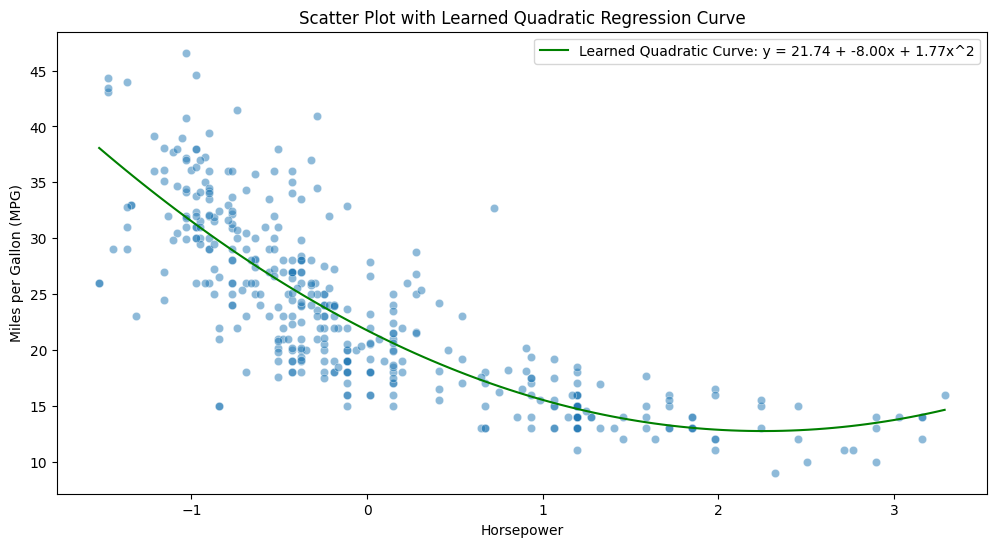

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['intercept'] = 1
df['horsepower_squared'] = df['horsepower'] ** 2

z = df[['intercept', 'horsepower', 'horsepower_squared']].values
y_quad = df['mpg'].values

W = np.linalg.inv(z.T @ z) @ z.T @ y_quad

w0, w1, w2 = W

plt.figure(figsize=(12, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df, alpha=0.5)

z_values = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
y_values_quad = w0 + w1 * z_values + w2 * z_values**2
plt.plot(z_values, y_values_quad, color='green', label=f'Learned Quadratic Curve: y = {w0:.2f} + {w1:.2f}x + {w2:.2f}x^2')


plt.title('Scatter Plot with Learned Quadratic Regression Curve')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.legend()
plt.show()


Converged after 364 epochs.


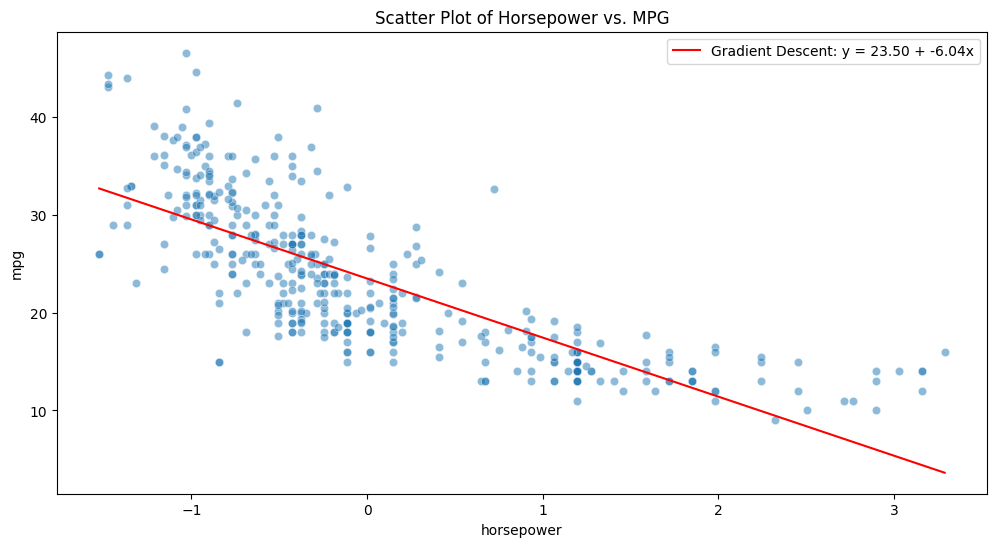

Converged after 364 epochs.


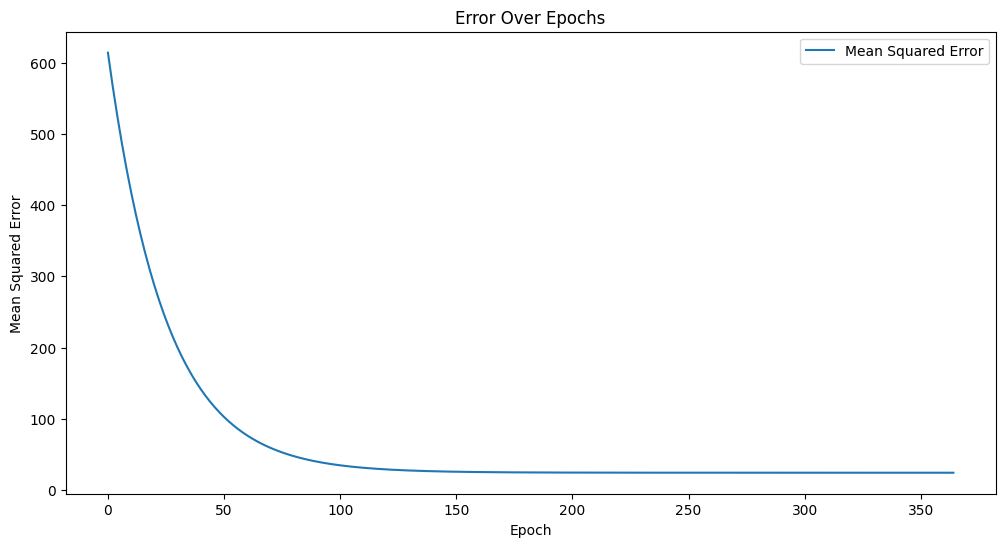

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['intercept'] = 1

X = df[['intercept', 'horsepower']].values
y = df['mpg'].values

learning_rate = 0.01
max_epochs = 1000
convergence_threshold = 1e-5

w = np.zeros(X.shape[1])

errors = []
epochs = []

for epoch in range(max_epochs):
    predictions = X @ w

    errors_current = predictions - y

    gradients = (2 / len(y)) * (X.T @ errors_current)

    w = w - learning_rate * gradients

    mse = np.mean(errors_current**2)

    errors.append(mse)
    epochs.append(epoch)

    if epoch > 0 and abs(errors[-2] - errors[-1]) < convergence_threshold:
        print(f"Converged after {epoch} epochs.")
        break

w0_gradient_descent, w1_gradient_descent = w

plt.figure(figsize=(12, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df, alpha=0.5)
plt.title('Scatter Plot of Horsepower vs. MPG')

x_values = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
y_values_gradient_descent = w0_gradient_descent + w1_gradient_descent * x_values
plt.plot(x_values, y_values_gradient_descent, color='red', label=f'Gradient Descent: y = {w0_gradient_descent:.2f} + {w1_gradient_descent:.2f}x')
plt.legend()
plt.show()

print(f"Converged after {epoch} epochs.")
plt.figure(figsize=(12, 6))
plt.plot(epochs, errors, label='Mean Squared Error')
plt.title('Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
